##### 影像加入文字
這篇教學會介紹如何運用 OpenCV 裡的 putText() 方法，在影像上加入文字，並透過 PIL 函式庫，讓影像可以支援中文的顯示。

因為程式中的 OpenCV 會需要使用鏡頭或 GPU，所以請使用本機環境或使用 Anaconda Jupyter 進行實作，\
並安裝 OpenCV 函式庫 ( 參考：[OpenCV 函式庫](https://steam.oxxostudio.tw/category/python/ai/opencv.html) )。

##### putText() 加入文字 
putText() 方法可以在影像裡加入文字，使用方法如下 ( 支援的字型參考：[HersheyFonts](https://docs.opencv.org/4.x/d6/d6e/group__imgproc__draw.html#ga0f9314ea6e35f99bb23f29567fc16e11) )：

In [ ]:
cv2.putText(img, text, org, fontFace, fontScale, color, thickness, lineType)
# img 來源影像
# text 文字內容
# org 文字座標 ( 垂直方向是文字底部到影像頂端的距離 )
# fontFace 文字字型
# fontScale 文字尺寸
# color 線條顏色，使用 BGR
# thickness 文字外框線條粗細，預設 1
# lineType 外框線條樣式，預設 cv2.LINE_8，設定 cv2.LINE_AA 可以反鋸齒

下方的程式執行後，會在 300x150 的黑色畫布上，加入 Hello 的文字：

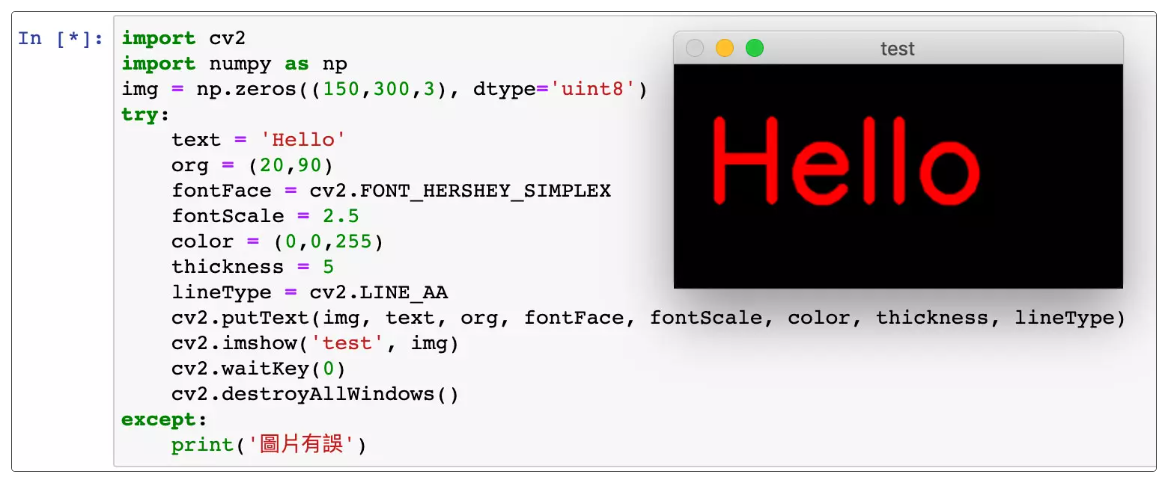

In [ ]:
import cv2
import numpy as np
img = np.zeros((150,300,3), dtype='uint8')   # 建立 300x150 的黑色畫布
text = 'Hello'
org = (20,90)
fontFace = cv2.FONT_HERSHEY_SIMPLEX
fontScale = 2.5
color = (0,0,255)
thickness = 5
lineType = cv2.LINE_AA
cv2.putText(img, text, org, fontFace, fontScale, color, thickness, lineType)
cv2.imshow('oxxostudio', img)
cv2.waitKey(0)      # 按下任意鍵停止
cv2.destroyAllWindows()

##### 使用中文字型 
如果要使用中文字型，必須搭配 PIL 函式庫，下方的範例使用 Google 雲端字型 ( Noto Sans Traditional Chinese )，\
下載字型檔案後與程式放在同一個資料夾裡，先繪製為 PIL 圖形，再將圖形轉換成 numpy 陣列，就能轉換成 opencv 的影像。

* 圖像使用 NumPy 的陣列格式，座標為 (y, x, 色彩深度)

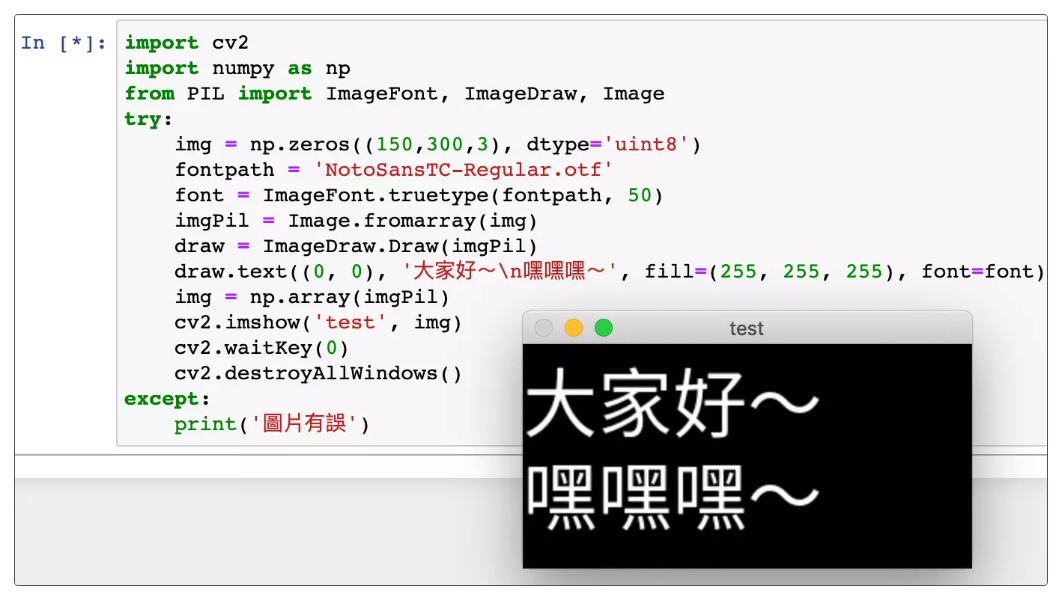

In [ ]:
import cv2
import numpy as np
from PIL import ImageFont, ImageDraw, Image    # 載入 PIL 相關函式庫
img = np.zeros((150,300,3), dtype='uint8')   # 繪製黑色畫布
fontpath = 'NotoSansTC-Regular.otf'          # 設定字型路徑
font = ImageFont.truetype(fontpath, 50)      # 設定字型與文字大小
imgPil = Image.fromarray(img)                # 將 img 轉換成 PIL 影像
draw = ImageDraw.Draw(imgPil)                # 準備開始畫畫
draw.text((0, 0), '大家好～\n嘿嘿嘿～', fill=(255, 255, 255), font=font)  # 畫入文字，\n 表示換行
img = np.array(imgPil)                       # 將 PIL 影像轉換成 numpy 陣列
cv2.imshow('oxxostudio', img)
cv2.waitKey(0)
cv2.destroyAllWindows()